# Reinforcement Learning - A Simple Python Example and a Step Closer to AI with Assisted Q-Learning


In [87]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

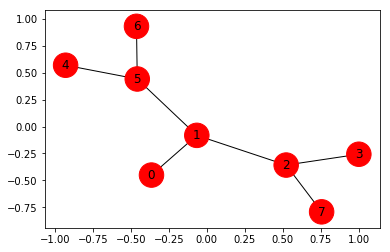

In [88]:
goal = 7

import networkx as nx
G=nx.Graph(figsize=(25, 6))
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=[600,600,600,600,600,600,600,600])
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [83]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))

print(R)




[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [84]:
R *= -1
print(R)

[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


In [85]:
# assign zeros to paths and 100 to goal-reaching point
print(R)


[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


In [86]:
for point in points_list:
    print(point)
    print(R)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0
    
print(R)
# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
(1, 5)
[[-1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
(5, 6)
[[-1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1.  0. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  0. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
(5, 4)
[[-1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1.  0. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

# R
matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])


In [69]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 295.20000000000005
Score: 182.65582655826557
max_value 0.0
Score: 182.65582655826557
max_value 0.0
Score: 182.65582655826557
max_value 236.16000000000005
Score: 262.6558265582656
max_value 0.0
Score: 262.6558265582656
max_value 295.20000000000005
Score: 262.6558265582656
max_value 295.20000000000005
Score: 262.6558265582656
max_value 0.0
Score: 262.6

max_value 204.30482398428595
Score: 981.4673515079301
max_value 499.03285934430846
Score: 981.0402739636636
max_value 204.30482398428595
Score: 981.0402739636636
max_value 399.2262874754468
Score: 981.0790345637956
max_value 255.38102998035743
Score: 981.0790345637956
max_value 319.2262874754468
Score: 981.3025136489325
max_value 399.2262874754468
Score: 981.3025136489325
max_value 499.03285934430846
Score: 981.3509643990976
max_value 319.2262874754468
Score: 981.3509643990976
max_value 319.2262874754468
Score: 981.3509643990976
max_value 499.2262874754468
Score: 981.0094798374917
max_value 399.2262874754468
Score: 981.0094798374917
max_value 203.59107418038548
Score: 981.3585306138422
max_value 319.2262874754468
Score: 981.3585306138422
max_value 204.30482398428595
Score: 981.3585306138422
max_value 319.2262874754468
Score: 981.3585306138422
max_value 319.2262874754468
Score: 981.3585306138422
max_value 319.2262874754468
Score: 981.3585306138422
max_value 399.2262874754468
Score: 981.

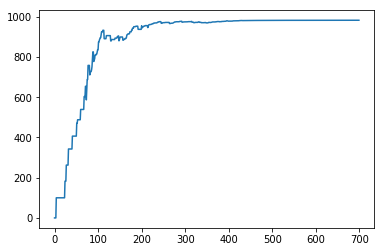

Most efficient path should be: [0, 1, 2, 7]


In [70]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()
print('Most efficient path should be: [0, 1, 2, 7]')

## Bees
Now let’s take this a step further, look at the top image again, notice how the factory is surrounded by smoke and the hive, by bees. Let’s assume that bees don’t like smoke or factories, thus there will never be a hive or bees around smoke. What if our bot could record those environmental factors and turn them into actionable insight? Whenever the bot finds smoke it can turn around immediately instead of continuing to the factory, whenever it finds bees, it can stick around and assume the hive it close.

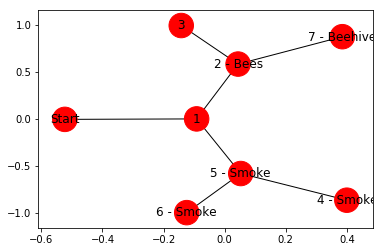

In [71]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[600,600,600,600,600,600,600,600])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()


We assign node 2 as having bees and nodes 4,5,6 as having smoke. Our Q-learning bot doesn’t know yet that there are bees or smoke there nor does it know that bees are good and smoke bad in finding hives. The bot needs to do another run like we just did, but this time it needs to collect environmental factors.

Here is the new update function with the capability of updating the Q-learning scores when if finds either bees or smoke.

In [72]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  environment = collect_environmental_data(action)
  if 'b' in environment: 
    enviro_bees[current_state, action] += 1
  
  if 's' in environment: 
    enviro_smoke[current_state, action] += 1
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 0.0
max_value 244.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 295.20000000000005
max_value 236.16000000000005
max_value 0.0
max_value 0.0
max_value 236.16000000000005
max_value 0.0
max_value 236.16000000000005
max_value 0.0
max_value 236.16000000000005
max_value 0.0
max_value 188.92800000000005
max_value 0.0
max_value 236.16000000

The environmental matrices show how many bees and smoke the bot found during its journey while searching for the most efficient path to the hive. To make this walk-through simpler, I am assuming two things - we modeled the environmental data and found out that the bees have a positive coefficient on finding hives, and smoke, a negative one. And we are going to reuse the environmental matrix already mapped out for our landscape, a more realistic approach would be to dynamically look at a new environment and assign environmental biases as they are encountered.

max_value 0.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 295.20000000000005
Score: 182.65582655826557
max_value 0.0
Score: 182.65582655826557
max_value 236.16000000000005
Score: 262.6558265582656
max_value 236.16000000000005
Score: 262.6558265582656
max_value 0.0
Score: 262.6558265582656
max_value 0.0
Score: 262.6558265582656
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 

C:\Users\tulls\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


 246.99280074525905
Score: 847.3827786355074
max_value 385.92625116446726
Score: 847.3827786355074
max_value 246.99280074525905
Score: 847.3827786355074
max_value 385.92625116446726
Score: 847.3827786355074
going from: [0 2 5]
to: [0 2]
max_value 244.7410009315738
Score: 847.3827786355074
max_value 308.7410009315738
Score: 847.9662579419528
going from: [0 2 5]
to: [0 2]
max_value 385.92625116446726
Score: 847.9662579419528
going from: [0 2 5]
to: [0 2]
max_value 385.92625116446726
Score: 847.9662579419528
max_value 385.92625116446726
Score: 847.9662579419528
max_value 246.99280074525905
Score: 847.9662579419528
going from: [0 2 5]
to: [0 2]
max_value 385.92625116446726
Score: 847.9662579419528
max_value 246.99280074525905
Score: 847.9662579419528
max_value 385.92625116446726
Score: 847.9662579419528
going from: [0 2 5]
to: [0 2]
max_value 246.99280074525905
Score: 848.4330413871091
max_value 308.7410009315738
Score: 849.0165206935545
max_value 246.99280074525905
Score: 849.016520693554

Score: 849.1836142673226
max_value 318.7910741803855
Score: 849.1836142673226
max_value 255.03285934430843
Score: 849.1836142673226
max_value 255.03285934430843
Score: 849.1836142673226
max_value 318.7910741803855
Score: 849.1836142673226
going from: [0 2 5]
to: [0 2]
max_value 255.03285934430843
Score: 849.368674592957
max_value 255.03285934430843
Score: 849.368674592957
max_value 255.03285934430843
Score: 849.368674592957
max_value 255.03285934430843
Score: 849.368674592957
max_value 318.7910741803855
Score: 849.368674592957
max_value 255.03285934430843
Score: 849.368674592957
max_value 318.7910741803855
Score: 849.368674592957
max_value 398.48884272548185
Score: 849.368674592957
max_value 398.48884272548185
Score: 849.368674592957
going from: [1 4 6]
to: [1]
max_value 318.7910741803855
Score: 849.368674592957
going from: [0 2 5]
to: [0 2]
max_value 255.03285934430843
Score: 849.368674592957
going from: [1 4 6]
to: [1]
max_value 318.7910741803855
Score: 849.368674592957
max_value 398

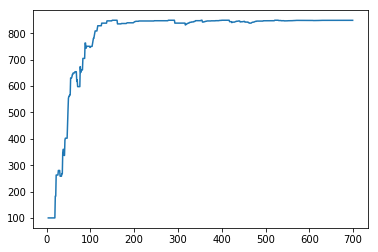

In [73]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
 

plt.plot(scores)
plt.show()

We see that the bot converges in less tries, say around 100 less, than our original model. This isn’t meant to be a controlled environment to compare both approaches, instead it’s about triggering thoughts on different ways of applying reinforced learning for discovery